<a href="https://colab.research.google.com/github/OlgaTihanovich/DataScience/blob/main/HomeWork5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#загрузка файла
df=pd.read_csv('/content/possum.csv')

# Просматриваем первые несколько строк датасета
print(df.head(10))

# Получаем общую информацию о датасете
print(df.info())

# Выводим статистические данные о числовых столбцах
print(df.describe())

print(df.select_dtypes(include='object').describe())

#расчет количества уникальных значений
unique_values=df.nunique()
print(f"Количество уникальных значений\n {unique_values}")

#подсчитаем дубликаты
total_duplicates = df.duplicated().sum()
print(f"Количество полностью совпадающих строк: {total_duplicates}")

#Есть незаполненные значения
# Заполняем пропуски средним значением по колонке
for col in ['age', 'footlgth']:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Проверим, что пропусков больше нет
missing_values_count = df.isnull().sum()
print("Missing values count per column после заполнения:")
print(missing_values_count[missing_values_count > 0])

'''Будем предсказывать длину тела опоссума (totlngth), исходя из  других признаков:
age - возраст
hdlngth - длина головы, в мм.
skullw — ширина черепа, в мм.
taill — длина хвоста, в см.
footlgth — длина лапы
earconch — длина ушной раковины
eye — расстояние от медиального угла к латеральному углу правого глаза
chest — обхват груди (в см)
belly — обхват живота (в см)'''

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
5     6     1  Vic   f  1.0     93.1    54.8      90.5   35.5      73.2   
6     7     1  Vic   m  2.0     95.3    58.2      89.5   36.0      71.5   
7     8     1  Vic   f  6.0     94.8    57.6      91.0   37.0      72.7   
8     9     1  Vic   f  9.0     93.4    56.3      91.5   37.0      72.4   
9    10     1  Vic   f  6.0     91.8    58.0      89.5   37.5      70.9   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4   

/tmp/ipython-input-3473693140.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


'Будем предсказывать длину тела опоссума (totlngth), исходя из  других признаков:\nage - возраст\nhdlngth - длина головы, в мм.\nskullw — ширина черепа, в мм.\ntaill — длина хвоста, в см.\nfootlgth — длина лапы\nearconch — длина ушной раковины\neye — расстояние от медиального угла к латеральному углу правого глаза\nchest — обхват груди (в см)\nbelly — обхват живота (в см)'

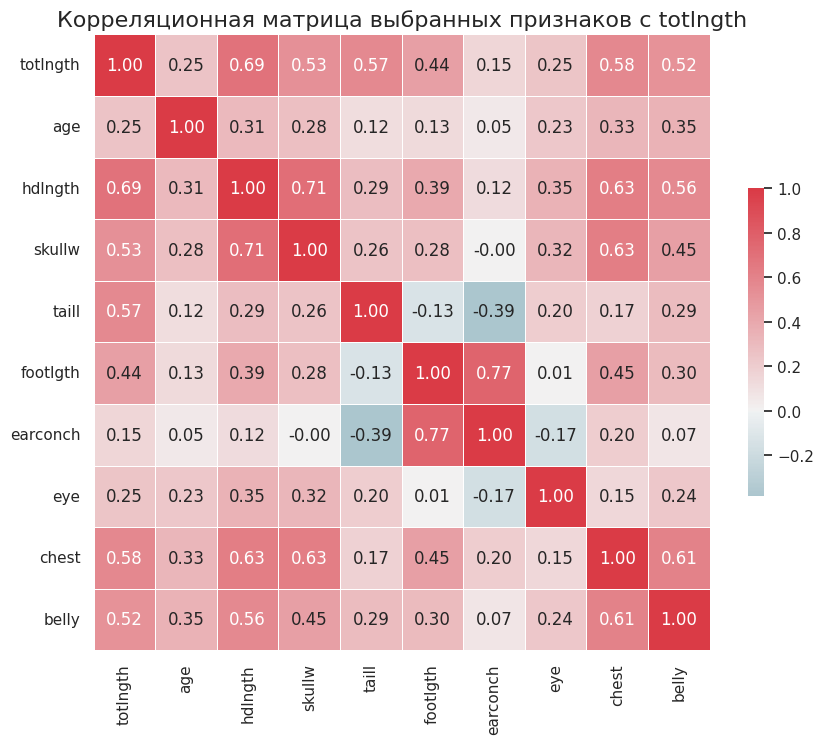

In [2]:
# Определяем целевую переменную и признаки
target = 'totlngth'
predictors = ['age', 'hdlngth', 'skullw', 'taill',
              'footlgth', 'earconch', 'eye', 'chest', 'belly']

# Отфильтруем датафрейм для корреляции
numeric_df = df[[target] + predictors]

# Рассчитываем корреляционную матрицу
corr_matrix = numeric_df.corr()

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Корреляционная матрица выбранных признаков с totlngth', fontsize=16)
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

# Определяем X и y
X = df[predictors]
y = df[target]

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

*****************
Метрики качества:
*****************
MAE: 2.2849
MSE: 7.7999
RMSE: 2.7928
R²: 0.2953


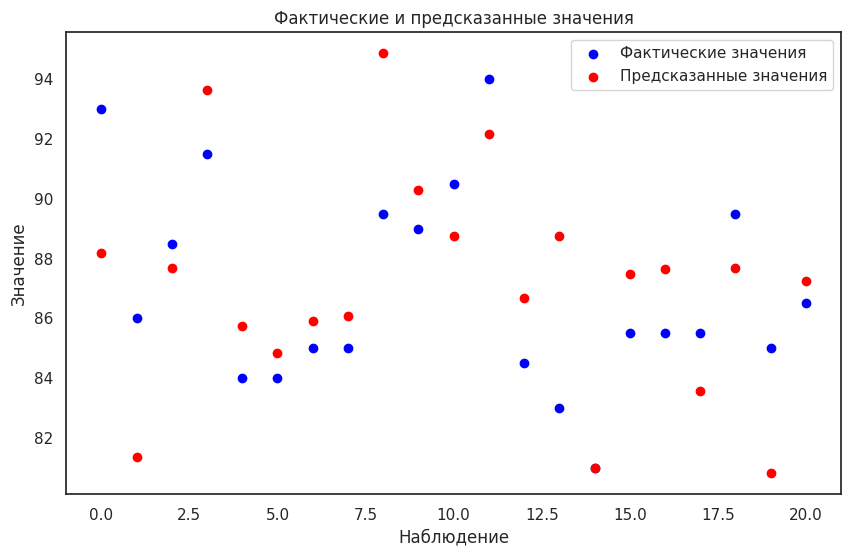

In [4]:
# Регрессор Gradient Boosting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=50)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


*****************
Метрики качества модели Random Forest Regressor:
*****************
MAE: 2.1200
MSE: 6.6123
RMSE: 2.5714
R²: 0.4026


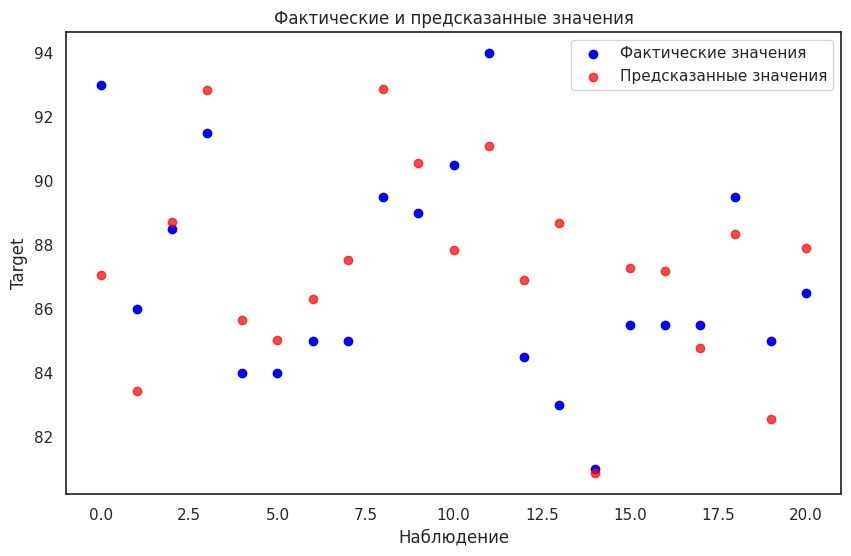

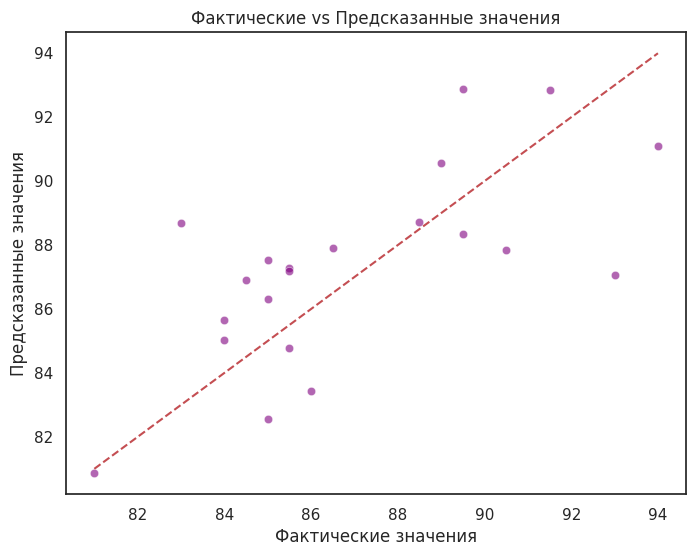

/tmp/ipython-input-3413530020.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')


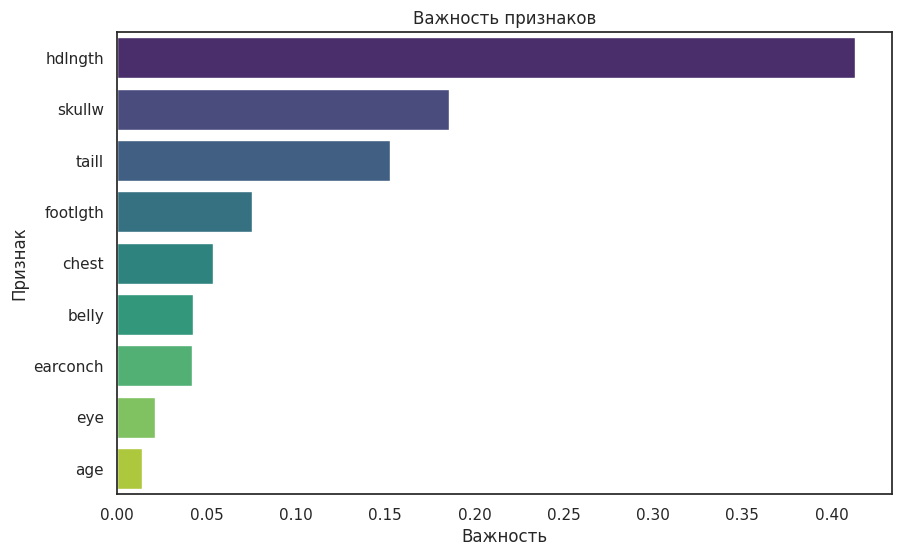

In [5]:
# RandomForestRegressor

# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Названия столбцов
feature_names = predictors

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели Random Forest Regressor
rfr = RandomForestRegressor(
    n_estimators=350,
    random_state=42
)
rfr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rfr.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели Random Forest Regressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Диаграмма предсказанных vs фактических значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

# Важность признаков
importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

*****************
Метрики качества модели Lasso Regressor:
*****************
MAE: 2.0376
MSE: 6.4512
RMSE: 2.5399
R²: 0.4172


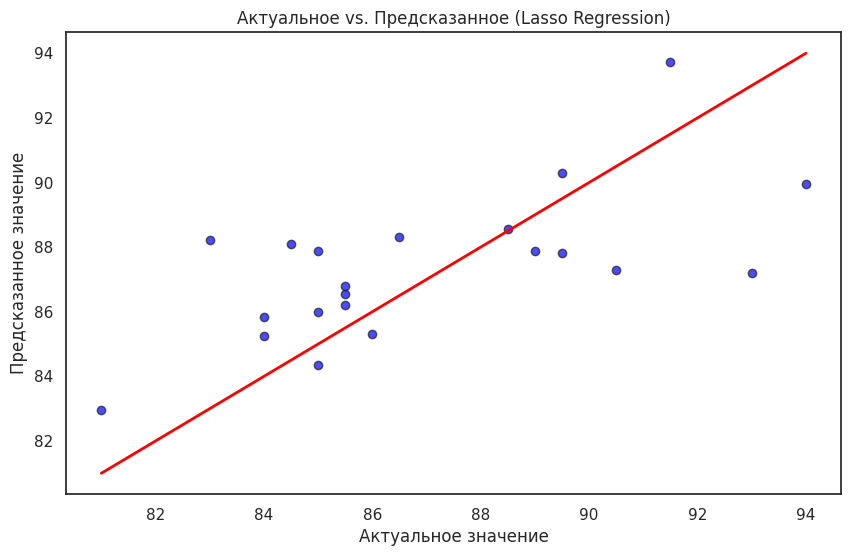

In [6]:
# Лассо
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели регрессии Lasso
regressor = Lasso(alpha=0.9)
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели Lasso Regressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Актуальное значение")
plt.ylabel("Предсказанное значение")
plt.title("Актуальное vs. Предсказанное (Lasso Regression)")
plt.show()


*****************
Метрики качества модели PassiveAggressiveRegressor:
*****************
MAE: 2.3476
MSE: 8.7272
RMSE: 2.9542
R²: 0.2116


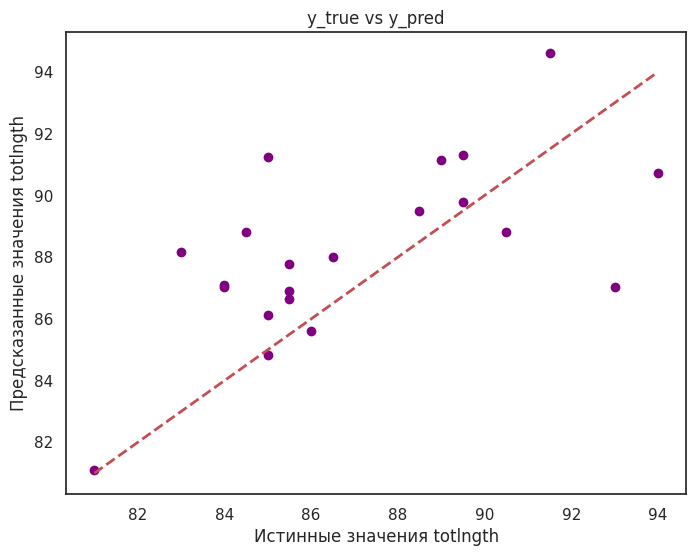

In [7]:
# PassiveAggressiveRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Разбиение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели Passive-Aggressive Regressor
par = PassiveAggressiveRegressor(C=3, loss='epsilon_insensitive', epsilon=0.18)
par.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = par.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели PassiveAggressiveRegressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация результата
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения totlngth')
plt.ylabel('Предсказанные значения totlngth')
plt.title('y_true vs y_pred')
plt.show()

*****************
Метрики качества модели ElasticNet:
*****************
MAE: 2.0359
MSE: 6.4591
RMSE: 2.5415
R²: 0.4165


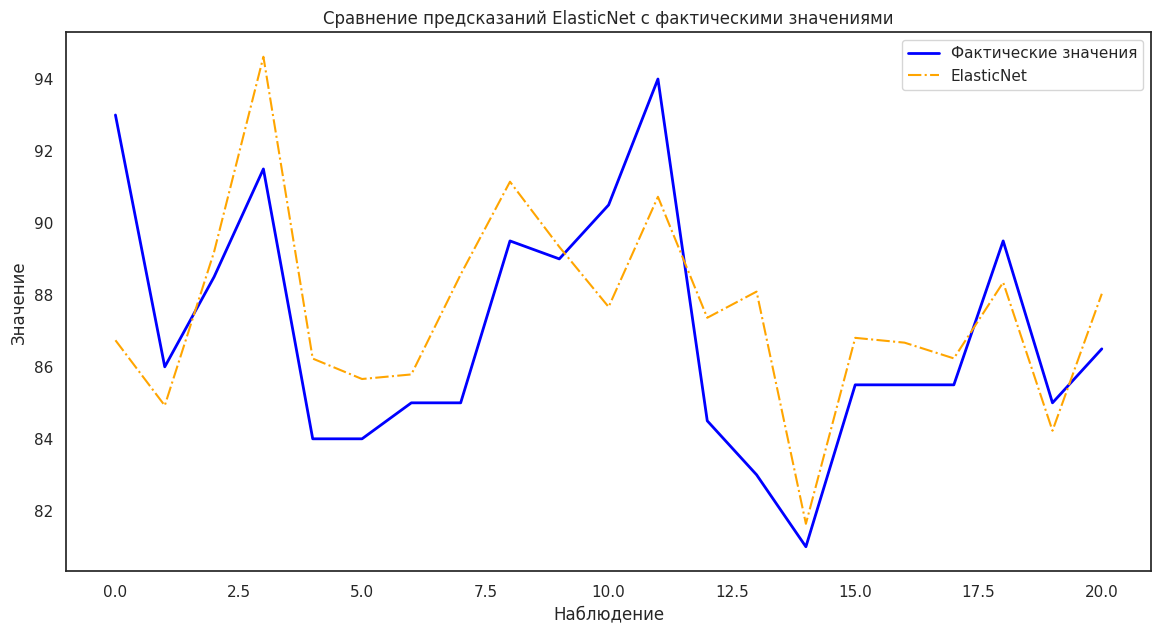

In [8]:
#ElasticNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель ElasticNet
elastic_net = ElasticNet(alpha=2.5, l1_ratio=0.3, random_state=42)

# Обучаем модель ElasticNet
elastic_net.fit(X_train, y_train)

# Делаем прогнозы на тестовом наборе
y_pred_en = elastic_net.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_en)
mse = mean_squared_error(y_test, y_pred_en)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_en)

print(f'*****************')
print(f'Метрики качества модели ElasticNet:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализируем предсказания ElasticNet и фактические значения
n = len(y_test)  # размер тестового набора

plt.figure(figsize=(14, 7))
plt.plot(range(n), y_test.values, label='Фактические значения', color='blue', linewidth=2)
plt.plot(range(n), y_pred_en, label='ElasticNet', color='orange', linestyle='-.')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний ElasticNet с фактическими значениями')
plt.legend()
plt.show()

In [ ]:
#Из выбранных регрессоров найбольшую точность показывают Lasso (0.4172) и ElasticNet (0.4165).
#Немного меньше показывает RandomForest (0.4026). Из возможных причин низких метрик - малое количество измерений.